In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 01a

## Implementation of MP Neuron.
### Note: for ease of explanation, used modified file only
<div>
<img src='../../images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>
    </div>

## 1. Import Statements
Import all the libraries.

In [2]:
###-----------------
### Import libraries
###-----------------

import os  # Operating system-related functions and utilities
import numpy as np  # NumPy for numerical computations
import pandas as pd  # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib for data visualization

from sklearn.model_selection import train_test_split  # for train-test splitting
from sklearn.metrics import accuracy_score  # for accuracy score calculation

## 2. Setup Global Parameters

In [3]:
###------------------
### Global Parameters
###------------------

# Directories
inpDir = '../../input'
outDir = '../output'


RANDOM_STATE = 42 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

## 3. Load Data Set

<div class="alert alert-block alert-info" style="font-family: Arial; font-size:1.1em;">
This data is generated from SKLearn Breast Cancer data.
</div>

In [4]:
# read CSV from the disk
data_df = pd.read_csv(os.path.join(inpDir, 'breast_cancer_mod.csv'))
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
565,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
566,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
567,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
data_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

###  Class Distribution
212 - Malignant, 357 - Benign

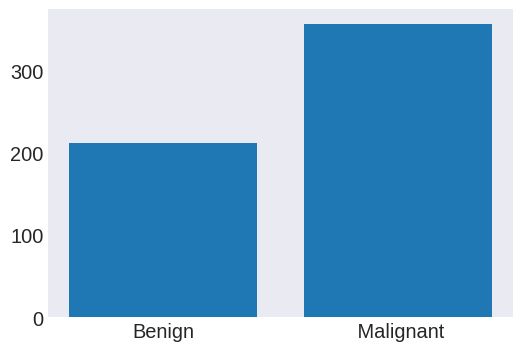

In [6]:
# create list of labels
labels = [' Malignant', 'Benign']

# instantiate figure and axis
fig, ax = plt.subplots(figsize=(6,4))

# plot bars on the axis
ax.bar(data_df['target'].value_counts().index, data_df['target'].value_counts().values)

# Set custom x-axis tick labels
ax.set_xticks(data_df['target'].value_counts().index)

# Add label text
ax.set_xticklabels(labels)

ax.grid();

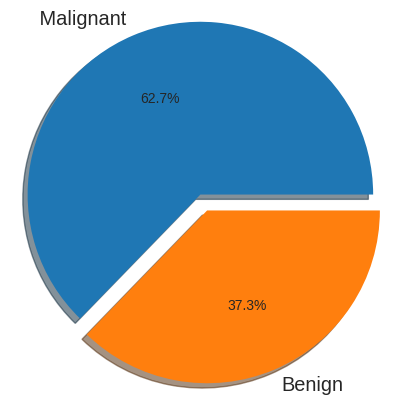

In [7]:
fig, ax = plt.subplots(figsize = (5,5))

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. '1')

ax.pie(data_df['target'].value_counts(), 
       explode=explode, 
       labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=0)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
features = data_df.drop('target', axis = 1)
labels = data_df['target']

In [9]:
# Split X and y in train and test sets
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels, 
                                                    test_size=TEST_SIZE, # proportion to include in the test split
                                                    stratify = labels,  # split in a stratified fashion, using this as the class labels
                                                    random_state=RANDOM_STATE) # set the random state

# what does shape look like
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


# Over to MP Neurons
<img src='../../images/dnn_nb_s01_fig_1.png' width='350' />

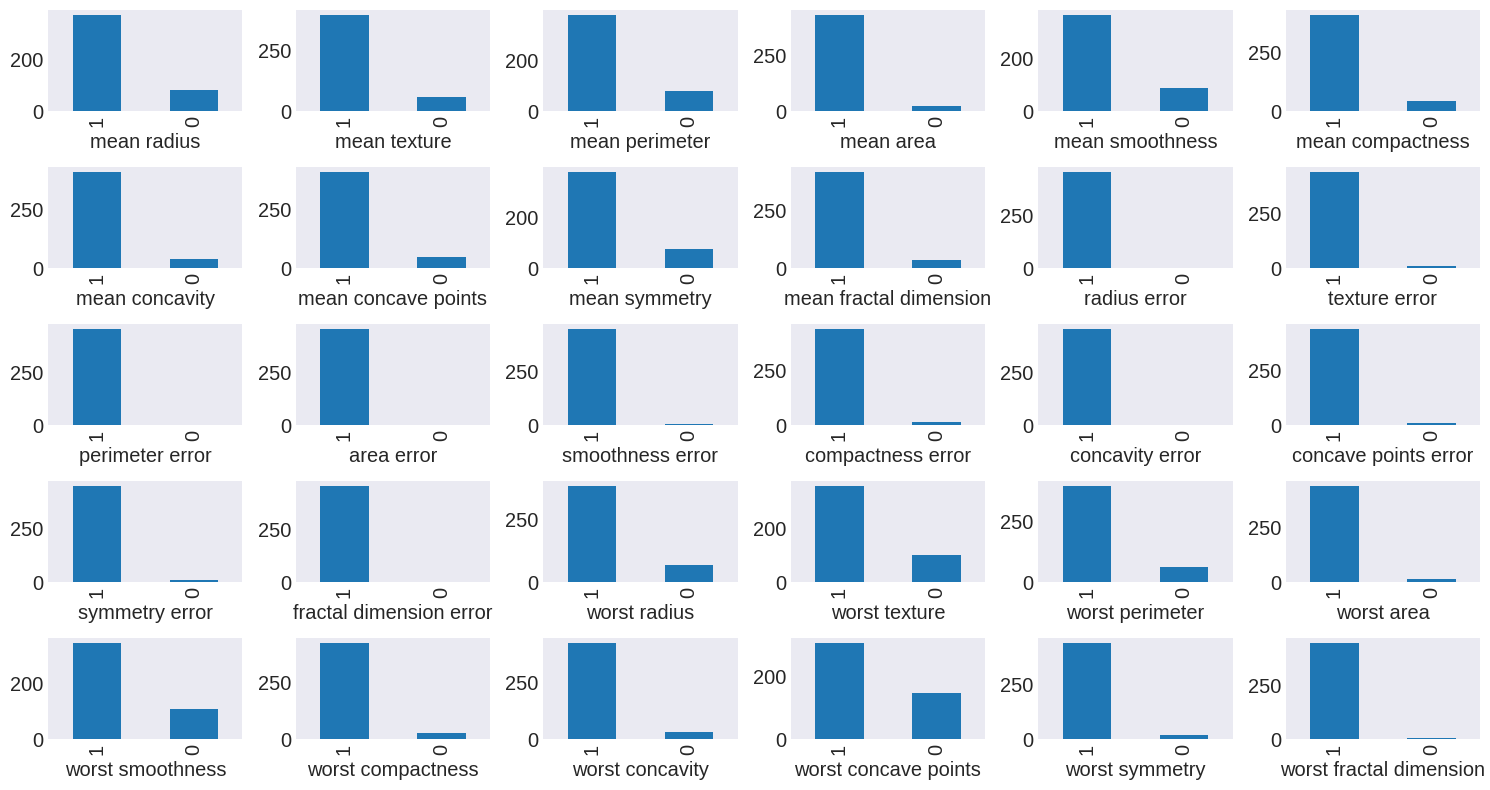

In [10]:
# Plot Training data

fig, axes = plt.subplots(5,6, figsize = (15, 8)) # 5 x 6 = 30 columns

axes = axes.ravel() # convert 2d Array to single dimension

# Iterate all columns and plot individually
for i, col in enumerate(X_train.columns):
    
    ax = X_train[col].value_counts().plot(ax=axes[i], kind='bar');
    
    ax.grid()

plt.tight_layout()

In [11]:
 # create a column with sums
X_train['total'] = X_train.astype(np.int16).sum(axis=1) # convert to integer from object

X_train['target'] = y_train # target column from y_train

X_train.sort_values('total', inplace = True) # sort the values as per total

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,1,1,12,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,13,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,14,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,14,0
7,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,15,0


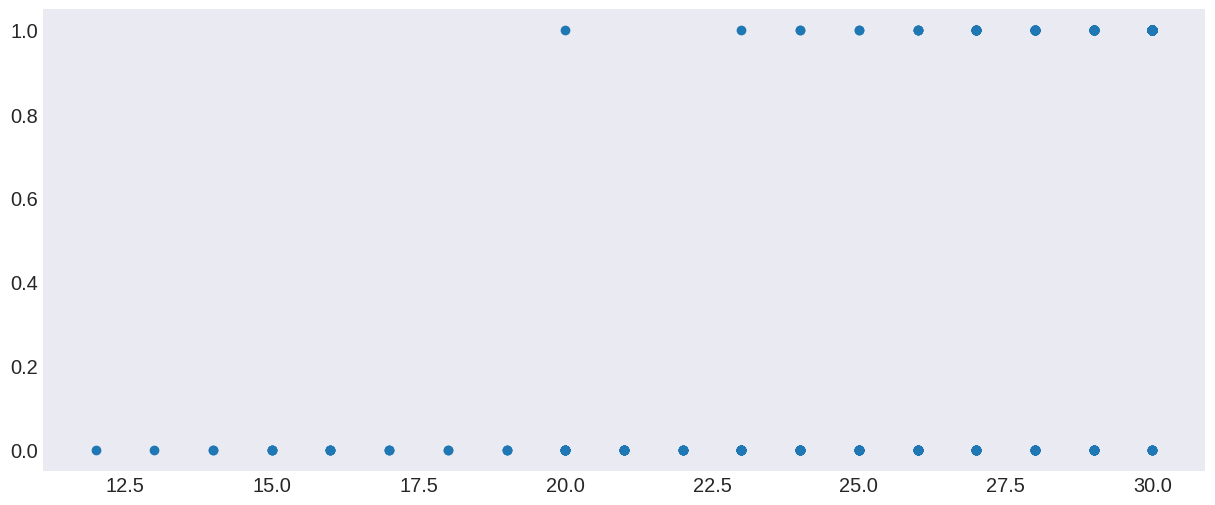

In [12]:
plt.scatter(X_train['total'], X_train['target']);
plt.grid()

In [13]:
# convert to log(odd of target) = np.log(p/(1-p))
# 0.5, 0.731, 1


In [14]:
# Reapeat the above steps with test dataset
X_test['total'] = X_test.astype(np.int16).sum(axis=1)

X_test['target'] = y_test

X_test.sort_values('total', inplace = True)

X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,1,0,1,1,13,0
14,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,1,0,0,1,17,0
20,1,1,1,1,1,0,1,1,0,0,...,1,1,0,0,0,0,0,0,18,0
21,1,1,1,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,0,19,0
39,0,1,0,1,0,1,0,0,1,1,...,0,0,1,1,0,0,1,1,20,0


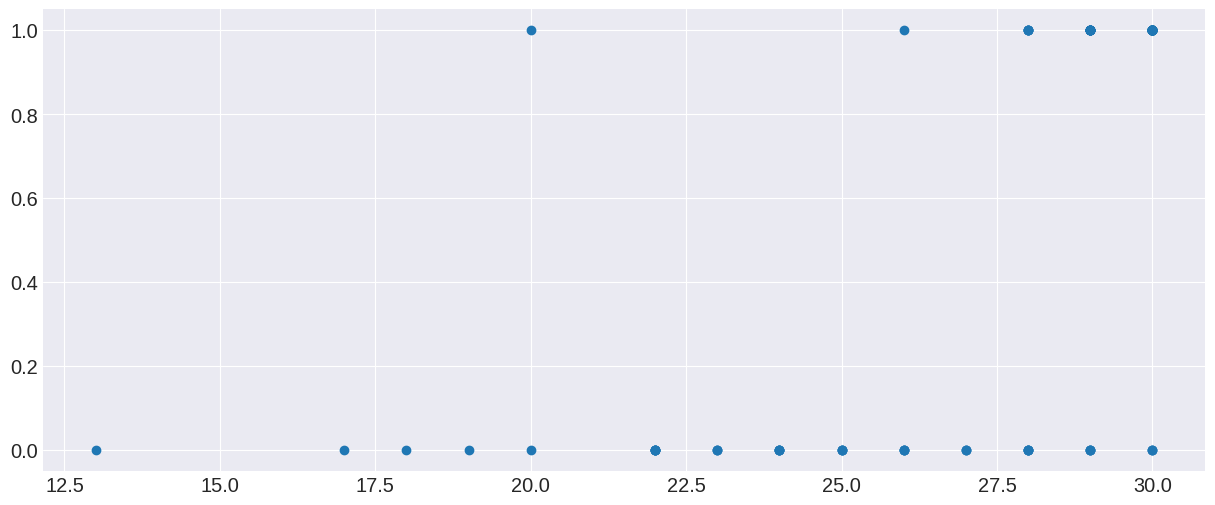

In [15]:
plt.scatter(X_test['total'], X_test['target']);

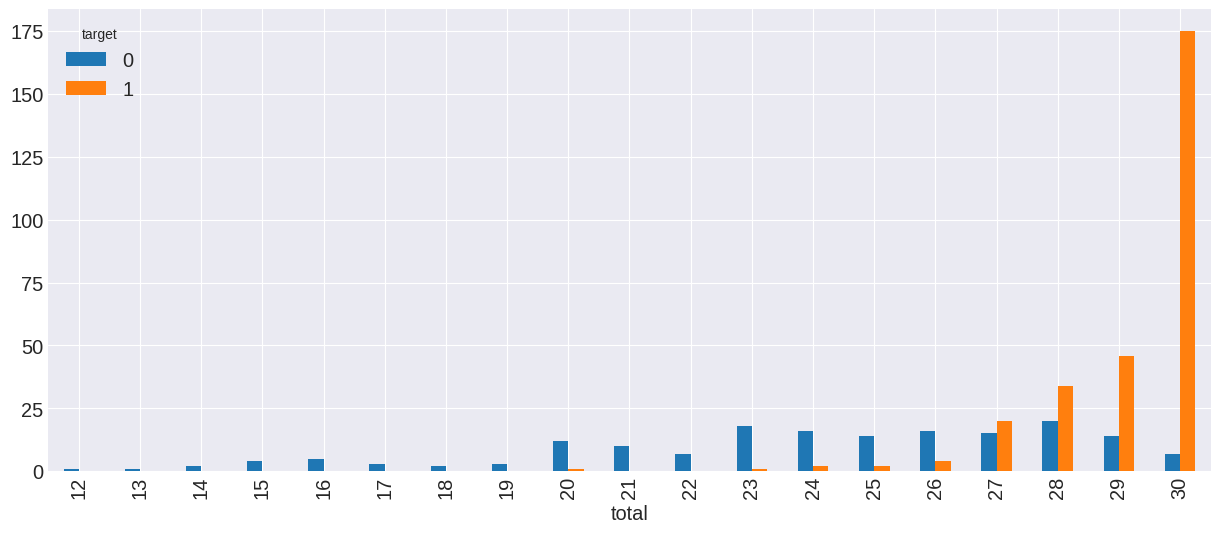

In [16]:
# plot Count of totals in the train set
tmp_df = X_train.groupby(['total', 'target']).agg({'target': 'count'}) # Create a tmp dataframe

tmp_df.columns = ['count'] # rename column

tmp_df.reset_index(inplace = True) # reset index helps

tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar'); # create a pivot and plot

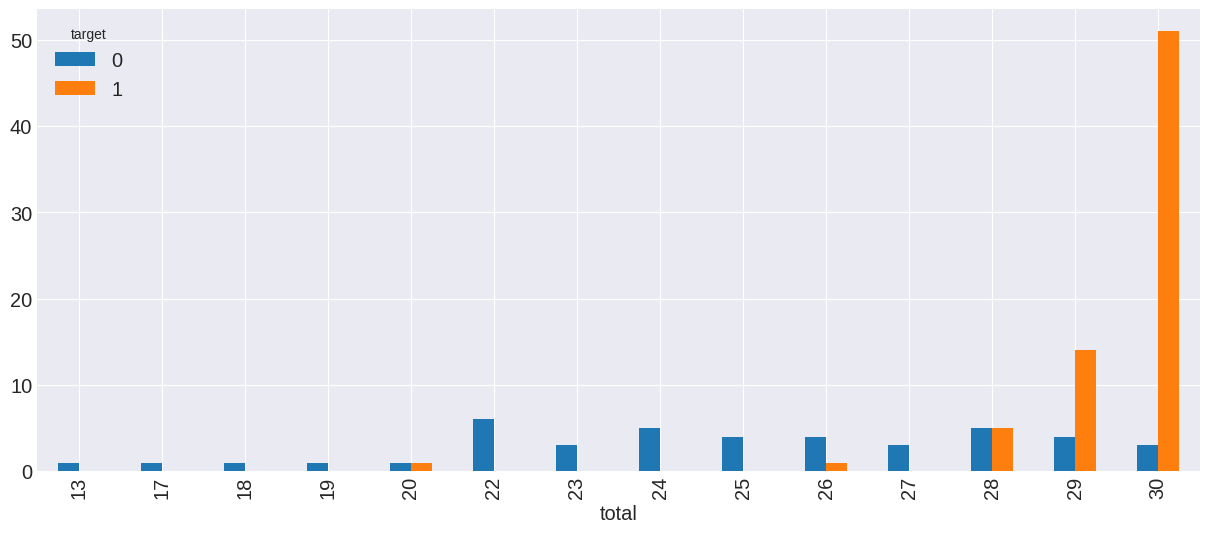

In [17]:
# repeat for test set

tmp_df = X_test.groupby(['total', 'target']).agg({'target': 'count'})

tmp_df.columns = ['count']

tmp_df.reset_index(inplace = True)

tmp_df.pivot(index='total', columns='target', values='count').plot(kind = 'bar');

In [18]:
# Calculate accuracy
accuracy = {}

# loop over the rows

for b in range(X_train.shape[1]):
    
    X_train['y_pred'] = X_train['total'] >= b # make prediction based on total
    
    accuracy[b] = accuracy_score(X_train['y_pred'], X_train['target']) # calculate accuracy

In [19]:
best_b = max(accuracy, key = accuracy.get) # find best accuracy

print('Optimal value of b is', best_b)

print('Highest accuracy is: {0:4.2f} %'.format(accuracy[best_b] *100))

Optimal value of b is 27
Highest accuracy is: 85.49 %


In [20]:
# Using best b calculate accuracy on test set

X_test['y_pred'] = X_test['total'] >= best_b

test_accuracy = accuracy_score(X_test['y_pred'], X_test['target'])

print ('Accuracy of testing is: {0:4.2f} %'.format(test_accuracy*100))

Accuracy of testing is: 85.09 %


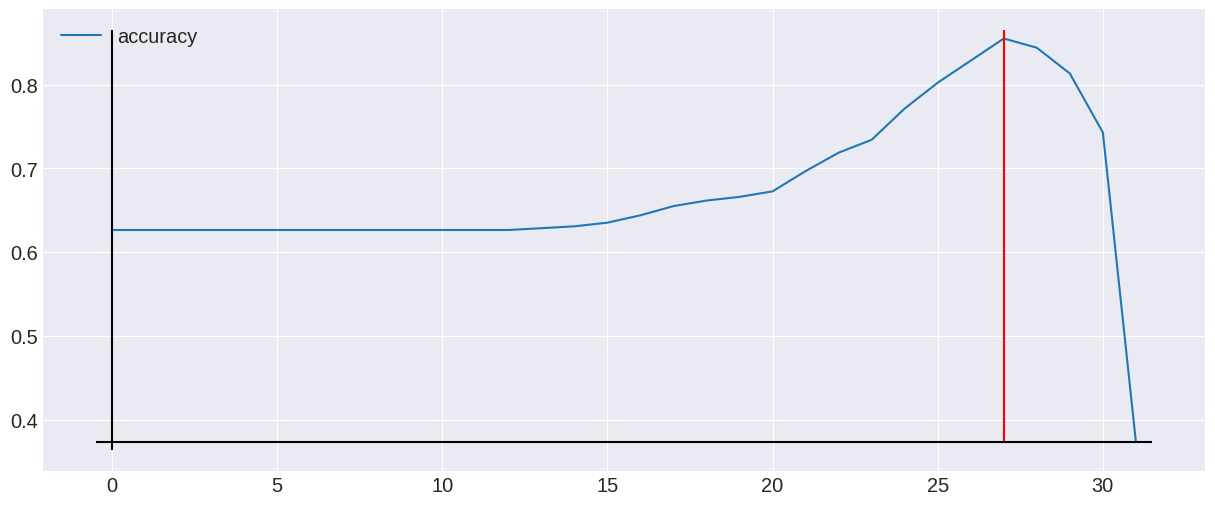

In [21]:
# plot results
ax = pd.DataFrame([accuracy], index = ['accuracy']).T.plot()

ax.vlines( x=best_b, ymin=min(accuracy.values()), ymax=accuracy[best_b]+0.01, colors='r')

ax.vlines( x = 0, ymin=min(accuracy.values())-0.01, ymax=accuracy[best_b]+0.01, colors='k')

ax.hlines( y=min(accuracy.values()), xmin=min(accuracy.keys())-0.5, xmax=max(accuracy.keys())+0.5, colors='k');